<a href="https://colab.research.google.com/github/Edesak/tensorflow-kurz/blob/main/07_milestone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

In [ ]:
print(tf.__version__)

2.6.0


# Milestone projekt BigFood

Zkontrolujeme GPu kvuli mixed presicions
 (Ty ktere maji pocitaci kapacitu 7.0 a vysší tak nejvíce benefitují)

In [ ]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# get helper functions 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-25 08:26:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-25 08:26:30 (90.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
import helper_functions as hf

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
dataset_list = tfds.list_builders() #vsechny mozne datasety 

In [ ]:
dataset_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
print("food101" in dataset_list)

True


In [ ]:
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                             split=["train","validation"],
                                             shuffle_files = False, #Zamixuje
                                             as_supervised = True, #Data se vrati v tubplu (data,label)
                                             with_info=True #ds_info stahne
                                             )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteIC214Z/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteIC214Z/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


##Becum one with data

* Class names
* shape of data
* Datatype
* Lables are one hot enconded
* Do labels match up with classnames

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
class_names = ds_info.features["label"].names

In [ ]:
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
train_data

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
for image,label in train_one_sample:
  print(f"""
  Image shape: {image.shape},
  Image datatype: {image.dtype},
  Target class from Food 101: {label},
  Class name: {class_names[label.numpy()]}
  """)


  Image shape: (512, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food 101: 56,
  Class name: huevos_rancheros
  


In [ ]:
#Jak tedy vypada nas Image kdy je type uint8

In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

In [ ]:
tf.reduce_min(image),tf.reduce_max(image) #maximalni a minimalni hodnota

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'huevos_rancheros')

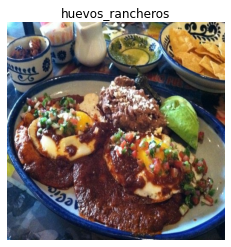

In [ ]:
plt.imshow(image)
plt.axis(False)
plt.title(class_names[label.numpy()])

##Udelani preprocesingu 

Nase data potrebujeme dat do 

* z unit8 na float32 (nebo mixed precision)
* Vsechny hodit na stejne rozliseni (image)
* nejsou normalizovany (mame 0-255 potrebujeme 0-1)
(Budeme pouzivat EfficientNet ten v sobe uz ma normalizujici vrstvu takze tohle resit nemusime)

1. Reshape
2. Konvertovat dtype na float32

In [ ]:
def preprocess_img(image,label, img_shape = 224):
  """
  Konvertuje dtype na dtype float32
  image na [img_shape,img_shape,collor channels]
  """

  image = tf.image.resize(image,[img_shape,img_shape])
  return tf.cast(image, tf.float32), label #vrati tuple image a label

In [ ]:
prep_img = preprocess_img(image,label)

In [ ]:
prep_img

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[230.65816  , 253.64285  , 251.       ],
         [222.99998  , 254.97449  , 252.19388  ],
         [207.06633  , 255.       , 250.36734  ],
         ...,
         [140.66287  , 129.52519  , 121.22428  ],
         [121.14268  , 115.265144 , 116.95397  ],
         [ 83.95363  ,  83.08119  ,  89.63737  ]],
 
        [[221.47449  , 254.37755  , 253.33163  ],
         [214.5102   , 255.       , 253.92348  ],
         [198.41327  , 254.58673  , 251.96939  ],
         ...,
         [208.66318  , 195.82143  , 173.40823  ],
         [197.03056  , 190.1071   , 174.83162  ],
         [175.54036  , 171.6169   , 161.21384  ]],
 
        [[204.21428  , 253.42857  , 249.57143  ],
         [198.71428  , 254.64287  , 251.2449   ],
         [185.04591  , 251.73979  , 252.21428  ],
         ...,
         [222.45403  , 207.47444  , 169.35715  ],
         [216.52551  , 205.01024  , 172.02556  ],
         [215.51529  , 207.87244  , 177.58672 

In [ ]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

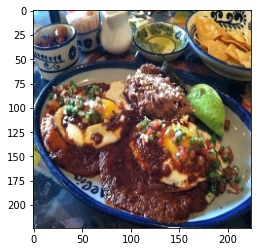

In [ ]:
plt.imshow(tf.cast(prep_img[0],tf.uint8))

In [ ]:
#Map preprocesing function a paralizovani

#Tohle nam vsechny data kter mame aplikuje na urcitou funkci (hodi se misto for cyklu) AUTOTUNE vyzuije maximalni mozny vykon na zpracovani (CPU)
train_data = train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)

#Zamychat train_data a rozdelit je do batchu a prefetched (Aby se rychleji nacitaly)

train_data  = train_data.shuffle(buffer_size=1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

test_data = test_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [ ]:
exp = tf.data.Dataset.unbatch(test_data)
y_true_easy = []
for img,label in exp:
  y_true_easy.append(label.numpy())

In [ ]:
y_true_easy[:20]

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100, 4, 32, 32, 3, 8, 85, 84, 60, 29, 80]

In [ ]:
y_true_easy[:20]

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100, 4, 32, 32, 3, 8, 85, 84, 60, 29, 80]

In [ ]:
from collections import Counter

In [ ]:
len(Counter(y_true_easy).keys())

101

##Udelani modeling callbacks 

1. Tensorboard callback 
2. Model checkpoint callback

In [ ]:
tb_callback_folder = "/content/Tensorboard"

In [ ]:
checkpoint = "/content/Checkpoints/cp"

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint,
                                                 'val_accuracy',
                                                 0,
                                                 True,
                                                 True)

In [ ]:
tf.keras.mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [ ]:
tf.keras.mixed_precision.global_policy()

<Policy "mixed_float16">

##Build feature extraction

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_shape = (224,224,3)

backbone = tf.keras.applications.EfficientNetB0(include_top=False)
backbone.trainable = False




In [ ]:
inputs = layers.Input(shape=input_shape, name = "Input_layer")
#Pokud budeme chtit rescaling(normalizaci dat)
#x = layers.Rescaling(1./255)(inputs)
x = backbone(inputs,training = False)
x = layers.GlobalAveragePooling2D(name = "GAP")(x)
x = layers.Dense(len(class_names))(x) 
# Activacni vrstvu musime dat zvlast kvuli nastaveni Dtype. 
#Jelikoz mame mixed precision tak kvuli stabilni presnosti musi byt vysledky uchovavany v float 32.
# Dense layer tuto moznost nema tudiz musime oddelit
outputs = layers.Activation("softmax",dtype = tf.float32, name = "softmax_float32")(x)
model = tf.keras.Model(inputs,outputs)

In [ ]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
GAP (GlobalAveragePooling2D) (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
for layer in model.layers:
  print( layer.dtype,layer.dtype_policy, layer.trainable,layer.name)


float32 <Policy "float32"> True Input_layer
float32 <Policy "mixed_float16"> False efficientnetb0
float32 <Policy "mixed_float16"> True GAP
float32 <Policy "mixed_float16"> True dense
float32 <Policy "float32"> True softmax_float32


* dtype_policy je v jakem rezimu pocita sve vahy 
* dtype je v jakem formatu uklada vysledky

In [ ]:
for layer in model.layers[1].layers:
  print( layer.dtype,layer.dtype_policy, layer.trainable,layer.name)

float32 <Policy "float32"> False input_1
float32 <Policy "mixed_float16"> False rescaling
float32 <Policy "mixed_float16"> False normalization
float32 <Policy "mixed_float16"> False stem_conv_pad
float32 <Policy "mixed_float16"> False stem_conv
float32 <Policy "mixed_float16"> False stem_bn
float32 <Policy "mixed_float16"> False stem_activation
float32 <Policy "mixed_float16"> False block1a_dwconv
float32 <Policy "mixed_float16"> False block1a_bn
float32 <Policy "mixed_float16"> False block1a_activation
float32 <Policy "mixed_float16"> False block1a_se_squeeze
float32 <Policy "mixed_float16"> False block1a_se_reshape
float32 <Policy "mixed_float16"> False block1a_se_reduce
float32 <Policy "mixed_float16"> False block1a_se_expand
float32 <Policy "mixed_float16"> False block1a_se_excite
float32 <Policy "mixed_float16"> False block1a_project_conv
float32 <Policy "mixed_float16"> False block1a_project_bn
float32 <Policy "mixed_float16"> False block2a_expand_conv
float32 <Policy "mixed_floa

In [ ]:
experiment_name = "experiment02_epochs_3"
history_model_1 = model.fit(train_data,
                            epochs = 3,
                            steps_per_epoch = len(train_data),
                            validation_data = test_data,
                            validation_steps = int(0.15*len(test_data),
                            callbacks = [hf.create_tensorboard_callback(tb_callback_folder,experiment_name),cp_callback])

Saving TensorBoard log files to: /content/Tensorboard/experiment02_epochs_3/20210824-145824
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 255s 93ms/step - loss: 1.8234 - accuracy: 0.5573 - val_loss: 1.2341 - val_accuracy: 0.6747
Epoch 2/3
2368/2368 [==============================] - 212s 89ms/step - loss: 1.2940 - accuracy: 0.6656 - val_loss: 1.1252 - val_accuracy: 0.7003
Epoch 3/3
2368/2368 [==============================] - 239s 100ms/step - loss: 1.1424 - accuracy: 0.7019 - val_loss: 1.0850 - val_accuracy: 0.7083


In [ ]:
results_of_FE_model = model.evaluate(test_data)

790/790 [==============================] - 46s 58ms/step - loss: 1.0850 - accuracy: 0.7083


In [ ]:
backbone.trainable = True

In [ ]:
len(model.layers[1].layers)

237

In [ ]:
for layer in model.layers[1].layers[:-37]:
  layer.trainable = False

In [ ]:
for i,layer in enumerate(model.layers[1].layers):
  print(i,layer.name,layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

In [ ]:
history_model_1.epoch[-3]

0

In [ ]:
experiment_name = "experiment03_finetune_37layers"
earlyStopCB = tf.keras.callbacks.EarlyStopping(patience=3)
history_model_1_finetune_37 = model.fit(train_data,
                                        initial_epoch =history_model_1.epoch[-1],
                                        epochs = 100,
                                        steps_per_epoch = len(train_data),
                                        validation_data = test_data,
                                        validation_steps = int(0.15*len(test_data)),
                                        callbacks = [hf.create_tensorboard_callback(tb_callback_folder,experiment_name),earlyStopCB])

Saving TensorBoard log files to: /content/Tensorboard/experiment03_finetune_37layers/20210824-151145
Epoch 3/100


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 178s 71ms/step - loss: 0.9303 - accuracy: 0.7524 - val_loss: 0.9332 - val_accuracy: 0.7468
Epoch 4/100
2368/2368 [==============================] - 167s 70ms/step - loss: 0.6844 - accuracy: 0.8162 - val_loss: 0.9240 - val_accuracy: 0.7524
Epoch 5/100
2368/2368 [==============================] - 166s 69ms/step - loss: 0.4781 - accuracy: 0.8716 - val_loss: 0.9895 - val_accuracy: 0.7405
Epoch 6/100
2368/2368 [==============================] - 169s 71ms/step - loss: 0.3030 - accuracy: 0.9200 - val_loss: 1.0776 - val_accuracy: 0.7386
Epoch 7/100
2368/2368 [==============================] - 170s 71ms/step - loss: 0.1725 - accuracy: 0.9554 - val_loss: 1.2271 - val_accuracy: 0.7336


In [ ]:
backbone.trainable = True

In [ ]:
model.load_weights("/content/Checkpoints/cp")

In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 46s 59ms/step - loss: 1.0850 - accuracy: 0.7083


[1.085004210472107, 0.7082772254943848]

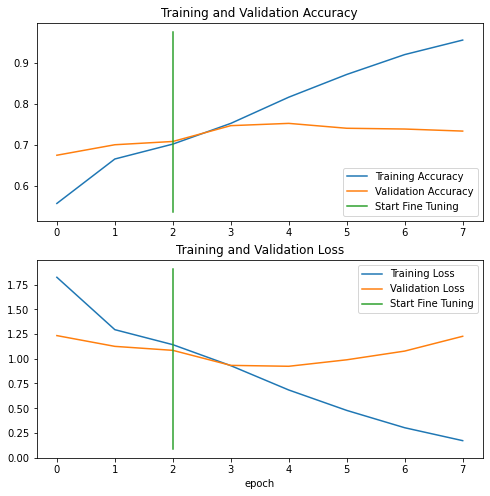

In [ ]:
hf.compare_historys(history_model_1,history_model_1_finetune_37,initial_epochs=3)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

In [ ]:
experiment_name = "experiment04_finetune_AllLayers"
earlyStopCB = tf.keras.callbacks.EarlyStopping(patience=3)
history_model_1_finetune_37 = model.fit(train_data,
                                        initial_epoch =history_model_1.epoch[-1],
                                        epochs = 100,
                                        steps_per_epoch = len(train_data),
                                        validation_data = test_data,
                                        validation_steps = int(0.15*len(test_data)),
                                        callbacks = [hf.create_tensorboard_callback(tb_callback_folder,experiment_name),
                                                     earlyStopCB,
                                                     tf.keras.callbacks.ModelCheckpoint("/content/Checkpoints/Finetune/cp",save_best_only=True,save_weights_only=True)])

Saving TensorBoard log files to: /content/Tensorboard/experiment04_finetune_AllLayers/20210824-152829
Epoch 3/100


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 333s 135ms/step - loss: 0.9221 - accuracy: 0.7523 - val_loss: 0.8117 - val_accuracy: 0.7722
Epoch 4/100
2368/2368 [==============================] - 316s 133ms/step - loss: 0.5801 - accuracy: 0.8390 - val_loss: 0.7787 - val_accuracy: 0.7865
Epoch 5/100
2368/2368 [==============================] - 319s 134ms/step - loss: 0.3286 - accuracy: 0.9070 - val_loss: 0.8534 - val_accuracy: 0.7879
Epoch 6/100
2368/2368 [==============================] - 319s 134ms/step - loss: 0.1754 - accuracy: 0.9487 - val_loss: 1.0222 - val_accuracy: 0.7775
Epoch 7/100
2368/2368 [==============================] - 317s 133ms/step - loss: 0.1083 - accuracy: 0.9659 - val_loss: 1.0624 - val_accuracy: 0.7810


In [ ]:
model.load_weights("/content/Checkpoints/Finetune/cp")

In [ ]:
model.evaluate(test_data)

790/790 [==============================] - 47s 59ms/step - loss: 0.7769 - accuracy: 0.7869


[0.7768688797950745, 0.7869306802749634]

In [ ]:
preds = model.predict(test_data)


In [ ]:
preds[:20].argmax(axis=1)

array([83, 49, 12, 73,  7, 33, 32, 69, 88, 54, 50, 80,  3, 38,  6, 27, 70,
       29, 81, 91])

In [ ]:
preds = model.predict(test_data)

In [ ]:
preds[:20].argmax(axis=1)

array([33, 90, 12,  9, 78, 49, 96, 48,  6, 38,  9, 74, 52,  7, 87, 90, 83,
       16, 60, 22])

In [ ]:
y_true = []
for image,label in test_data:
  y_true.append(label.numpy())


In [ ]:
flatten_y_true = [j for sub in y_true for j in sub]

In [ ]:
flatten_y_true[:20]

[57,
 48,
 79,
 44,
 43,
 81,
 27,
 22,
 46,
 47,
 99,
 70,
 100,
 90,
 21,
 59,
 1,
 75,
 61,
 74]

In [ ]:
y_true = []
for image,label in test_data:
  y_true.append(label.numpy())

In [ ]:
flatten_y_true = [j for sub in y_true for j in sub]

In [ ]:
flatten_y_true[:20]

[29, 91, 81, 53, 97, 97, 10, 3, 31, 4, 100, 32, 32, 3, 8, 85, 93, 83, 98, 40]

In [ ]:
exp = tf.data.Dataset.unbatch(test_data)
y_true_easy = []
for img,label in exp:
  y_true_easy.append(label.numpy())


In [ ]:
y_true_easy[:20]

[44, 65, 34, 69, 23, 78, 41, 70, 27, 13, 41, 32, 25, 20, 5, 59, 53, 37, 99, 60]

In [ ]:
exp = tf.data.Dataset.unbatch(test_data)
y_true_easy = []
for img,label in exp:
  y_true_easy.append(label.numpy())

In [ ]:
y_true_easy[:20]

[57,
 48,
 79,
 44,
 81,
 43,
 27,
 22,
 99,
 46,
 47,
 100,
 70,
 90,
 21,
 59,
 93,
 83,
 98,
 60]

In [ ]:
flatten_y_true[:20]

In [ ]:
exp

<_UnbatchDataset shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int64)>

Text(0.5, 1.0, 'easy: hummus normal: cup_cakes pred: poutine')

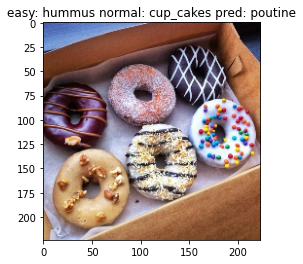

In [ ]:
plt.imshow(tf.cast(image[0],tf.uint32))
plt.title(f"easy: {class_names[y_true_easy[0]]} normal: {class_names[flatten_y_true[0]]} pred: {class_names[y_pred_f[0]]}")

In [ ]:
y_pred[:20]

[81, 1, 61, 74, 70, 60, 29, 80, 32, 78, 17, 1, 40, 40, 99, 1, 71, 4, 85, 44]

In [ ]:
import numpy as np

In [ ]:
y_true[0][0]

70

In [ ]:
y_pred = []
for i in range(len(preds)):
  y_pred.append(preds[i].argmax())
#preds[0].argmax()

In [ ]:
#range(len(preds))


In [ ]:
#y_true,y_pred

In [ ]:
flatten_y_true = [j for sub in y_true for j in sub]

In [ ]:
#y_true

In [ ]:
#flatten_y_true

In [ ]:
#import helper_functions as hf

In [ ]:
#hf.make_confusion_matrix(flatten_y_true,y_pred,class_names,(50,50),10,savefig=True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
sklearn_accuracy = accuracy_score(y_true_easy,
                                  y_pred)
sklearn_accuracy

0.009663366336633663

In [ ]:
y_labels = []

for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
sklearn_accuracy = accuracy_score(y_true_easy,
                                  y_pred_f)
sklearn_accuracy

0.06293069306930693

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
y_pred_f = y_pred.argmax(axis=1)

In [ ]:
y_pred_f[1]

79